# 1. Latar Belakang
Seorang pengusaha hendak mendirikan sebuah perusahaan penyedia jasa taksi online. Untuk menemukan strategi yang tepat dalam menarik minat customer, diperlukan adanya analisis data yang berkaitan dengan kebutuhan customer terhadap jasa taksi online yang sudah tercatat sebelumnya.

### 1.1 Pernyataan Masalah
Stakeholder dari proyek ini adalah pengusaha yang hendak mendirikan sebuah jasa taksi online baru. Stakeholder ingin mengetahui strategi yang paling tepat agar jasa taksi online yang ia dirikan mendapatkan minat yang besar di kalangan konsumen. Maka dari itu, terdapat beberapa pertanyaan yang perlu dijawab dengan menggunakan analisis data, yaitu:

**a. Berapa jumlah penumpang dalam sekali pemesanan?**
*(Pertanyaan ini bertujuan untuk menentukan jenis mobil yang akan digunakan sebagai armada taksi online)*

**b. Apa tipe perjalanan yang paling banyak digunakan oleh konsumen?**
*(Pertanyaan ini bertujuan untuk menentukan apakah pengemudi perlu berkeliling untuk mencari penumpang atau cukup mengembangkan aplikasi untuk pemesanan secara online)*


# 2. Data
Guna menentukan hal-hal apa saja yang bisa dilakukan untuk menarik minat konsumen dalam menggunakan jasa taksi online yang akan didirikan, maka diperlukan suatu dataset. Data yang digunakan adalah data terbaru tentang perjalanan konsumen saat menggunakan taksi online. Dalam proyek ini, dataset yang digunakan berjudul "NYC TLC Trip Record". Berikut adalah tampilan 5 baris teratas dan terbawah dari dataset yang digunakan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


### 2.1 Data Understanding and Cleaning
Sebelum memasuki proses analisis, data harus dipahami dan dibersihkan terlebih dahulu. Data understanding bertujuan untuk memahami data mana saja yang dibutuhkan dalam proses analisis dan mendeteksi anomali apa saja yang terdapat pada data-data tersebut. Anomali ini akan dibersihkan pada proses data cleaning yang dapat dilakukan dengan cara mengahapus atau mengisi dengan data yang relevan sehingga tidak memberikan pengaruh buruk pada proses analisis yang menyebabkan hasil dari analisis data menjadi tidak akurat.

Berikut adalah hal-hal yang dapat dilakukan dalam proses data understanding dan data cleaning: 

#### a. Apakah semua data telah sesuai?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [8]:
display(df.describe(),df.describe(include = 'object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [9]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

Unique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
Unique

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

**Berdasarkan info di atas, beberapa hal yang dapat kita lihat yaitu:**
1. Dataset tersebut terdiri dari 68211 baris dan 20 kolom.
2. Terdapat beberapa kolom yang tidak dibutuhkan, yaitu kolom `extra`, `mta_tax`, `ehail_fee`, `improvement_surcharge`, dan `congestion_surcharge` sehingga lebih baik dihapus.
3. Terdapat data kosong yang diwakili dengan data 'NaN' pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type`, dan `congestion_surcharge`.
3. Semua data type telah sesuai dengan data yang terdapat pada masing-masing feature, namun data dalam kolom `passenger_count`harus diganti menjadi integer karena merupakan ratio.


In [ ]:
# Menghapus data yang tidak perlu

df.drop(columns=['extra', 'mta_tax', 'ehail_fee', 'improvement_surcharge', 'congestion_surcharge'],inplace=True)

In [20]:
display(df.head(), df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,4.03,0.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,2.64,0.0,15.84,1.0,1.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.94,0.0,11.64,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,1.70,0.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.00,0.0,8.00,1.0,1.0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.00,0.0,16.70,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.00,0.0,5.41,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,3.51,0.0,21.04,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,3.20,0.0,19.18,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,2.00,0.0,29.40,NaN,NaN


Semua kolom yang tidak dibutuhkan **telah terhapus**.

Karena data dalam kolom `passenger_count` merupakan ratio, maka sebaiknya diubah menjadi integer. Begitu pula dengan data pada kolom `RatecodeID`, `payment_type`, dan `trip_type` yang merupakan data nominal, dengan tujuan agar lebih mudah dibaca.

In [31]:
# Mengubah tipe data
df['RatecodeID'] = df['RatecodeID'].astype('int')
df['passenger_count'] = df['passenger_count'].astype('int')
df['payment_type'] = df['payment_type'].astype('int')
df['trip_type'] = df['trip_type'].astype('int')

In [33]:
# Memeriksa kembali apakah data type pada kolom-kolom di atas sudah berganti menjadi integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  int32  
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        68211 non-null  int32  
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  tip_amount             68211 non-null  float64
 11  tolls_amount           68211 non-null  float64
 12  total_amount           68211 non-null  float64
 13  payment_type           68211 non-null  int32  
 14  trip_type              68211 non-null  int32  
dtypes:

Data type pada kolom-kolom tersebut telah **berhasil diganti**.

#### b. Adakah duplicate, missing values atau outlier?

#### *Duplicates*

In [34]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68206    False
68207    False
68208    False
68209    False
68210    False
Length: 68211, dtype: bool

In [35]:
df.duplicated().sum()

0

Berdasarkan informasi di atas, dapat disimpulkan bahwa **tidak terdapat data duplikat pada dataset yang akan digunakan**.

#### *Missing Values*

In [24]:
# Persentase missing value pada masing-masing kolom
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       6.339154
RatecodeID               6.339154
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          6.339154
trip_distance            0.000000
fare_amount              0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
payment_type             6.339154
trip_type                6.353814
dtype: float64

In [39]:
# Memperbaiki missing value dengan cara mengisi data menggunakan mean (untuk data numerik) dan modus (untuk data kategorikal)

store_and_fwd_flag_mode = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode)

import math
RatecodeID = df['RatecodeID'].fillna(math.floor(df['RatecodeID'].mean()),inplace=True)
passenger_count = df['passenger_count'].fillna(math.floor(df['passenger_count'].mean()),inplace=True)
payment_type = df['payment_type'].fillna(math.floor(df['payment_type'].mean()),inplace=True)
trip_type = df['trip_type'].fillna(math.floor(df['trip_type'].mean()),inplace=True)

In [41]:
# Mengecek kembali adanya missing values pada dataset
df.isna().sum()/df.shape[0]*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
dtype: float64

Berdasarkan informasi di atas, dapat disimpulkan bahwa **missing value pada dataset telah berhasil diatasi**.

#### *Outliers*

In [42]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount',
       'tolls_amount', 'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

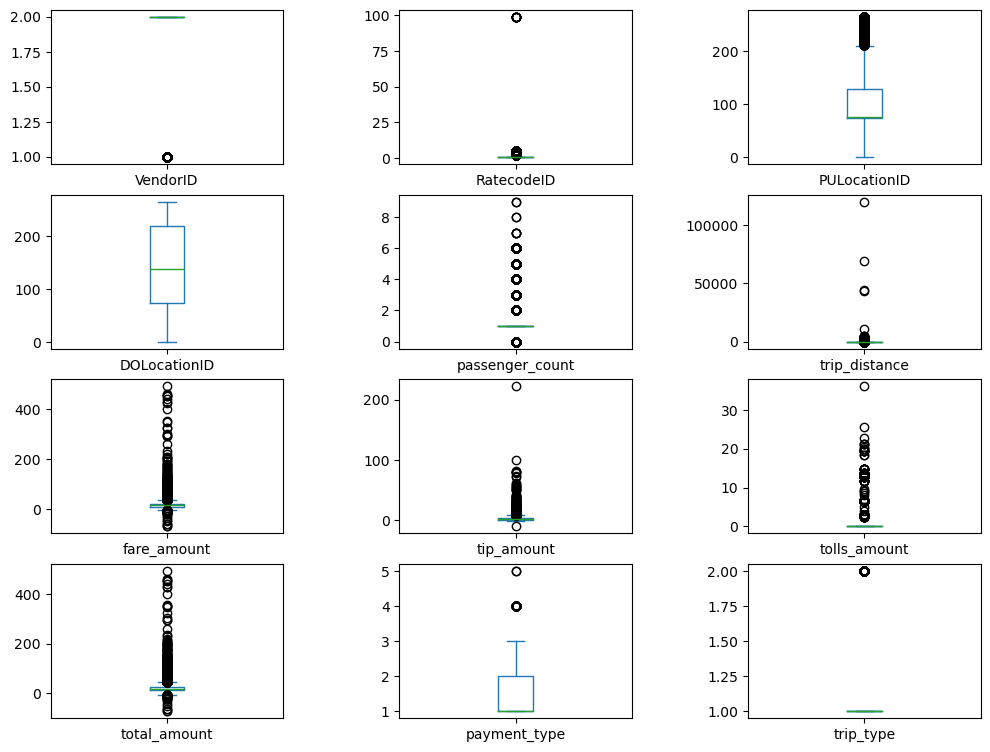

In [43]:
df.plot(subplots=True, layout=(6,3), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5)

Berdasarkan boxplot di atas, ditemukan banyak outlier pada masing-masing kolom (kecuali kolom `DOLocationID`). Namun, sebagian besar outlier tersebut masih termasuk dalam kategori masuk akal sehingga tidak perlu dilakukan langkah apapun terhadap outlier tersebut.

### 2.2 Data yang Sudah Bersih

Data yang sudah dibersihkan merupakan data yang telah siap untuk dianalisis. Berikut adalah hasil dari data cleaning yang telah dilakukan.

In [44]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(68211, 15)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[1, 2]"
1,lpep_pickup_datetime,object,0,66575,"[2023-01-30 18:40:56, 2023-01-05 11:52:00]"
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-24 20:28:03, 2023-01-30 22:09:18]"
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,int32,0,6,"[99, 5]"
5,PULocationID,int64,0,226,"[149, 60]"
6,DOLocationID,int64,0,249,"[165, 220]"
7,passenger_count,int32,0,10,"[1, 4]"
8,trip_distance,float64,0,1870,"[10.46, 11.12]"
9,fare_amount,float64,0,2553,"[31.16, 34.02]"


Data yang telah dibersihkan kini memiliki 15 kolom. Semua missing value telah diisi dengan menggunakan mean. Tipe data yang tidak sesuai juga telah diganti.

In [173]:
display(df.head(), df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,4.03,0.0,24.18,1,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,2.64,0.0,15.84,1,1
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,1.94,0.0,11.64,1,1
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,1.70,0.0,10.20,1,1
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.00,0.0,8.00,1,1


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1,49,62,1,4070.82,15.70,0.00,0.0,16.70,1,1
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1,10,205,1,2.14,4.41,0.00,0.0,5.41,1,1
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1,66,37,1,3.44,16.53,3.51,0.0,21.04,1,1
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1,225,189,1,3.03,14.98,3.20,0.0,19.18,1,1
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1,256,140,1,5.82,23.65,2.00,0.0,29.40,1,1


In [63]:
df.to_excel('Cleaned_Data.xlsx', index = False)

# 3. Data Analysis

Setelah melakukan data cleaning, tahap berikutnya adalah melakukan data analysis. Tahapan ini berguna untuk menjawab permasalahan yang ada sehingga dapat dicari solusi yang tepat untuk mengatasi permasalahan tersebut.

### 3.1 Berapa jumlah penumpang dalam sekali pemesanan?
Untuk menjawab pertanyaan ini, dapat dilakukan dengan melihat persentase dari jumlah penumpang di setiap pemesanan melalui data pada kolom `passenger_count`. Dalam hal ini, visualisasi data yang paling tepat adalah dengan menggunakan bar chart karena distribusi data pada kolom `passenger_count` cukup bervariasi.

In [121]:
penumpang = df['passenger_count']
persentase = (pd.Series(penumpang).value_counts()/df.shape[0]*100)
persentase

1    85.941555
2    7.472031 
5    2.598202 
6    1.545432 
3    1.404671 
4    0.533717 
0    0.492661 
7    0.005865 
9    0.002933 
8    0.002933 
Name: passenger_count, dtype: float64

In [116]:
x = df['passenger_count'].unique().tolist()
x

[1, 2, 4, 3, 6, 5, 0, 7, 9, 8]

In [117]:
persentase_list = list(persentase)
persentase_list

[85.94155510916262,
 7.472031201888535,
 2.5982023723992316,
 1.5454318851629743,
 1.4046714857553408,
 0.5337165144206096,
 0.49266139792671665,
 0.005865016641984722,
 0.002932508320992361,
 0.002932508320992361]

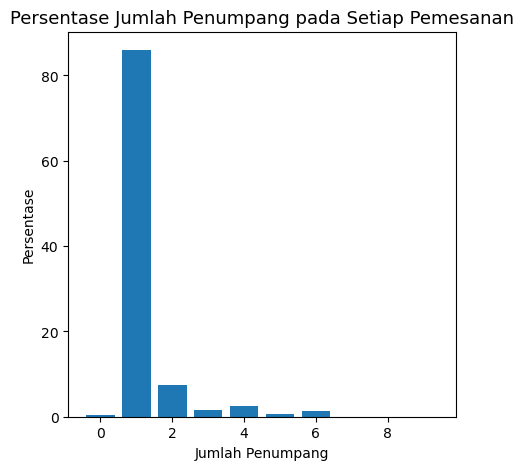

In [130]:
x = df['passenger_count'].unique().tolist()
y = persentase_list

plt.figure(figsize = (5,5))
plt.title('Persentase Jumlah Penumpang pada Setiap Pemesanan', size = 13)
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Persentase')
plt.bar(x,y)

plt.show()


**Berdasarkan barplot di atas, dapat kita ketahui bahwa:**
1. Jumlah penumpang dengan persentase tertinggi dalam tiap pemesanan adalah 1 orang.
2. Jumlah penumpang terbanyak yang pernah melakukan pemesanan adalah sebanyak 6 orang.
3. Adanya penumpang yang berjumlah 8 merupakan outlier, cukup diabaikan.

### 3.2 Apa tipe perjalanan yang paling banyak digunakan oleh konsumen?
Untuk menjawab pertanyaan ini, dapat dilakukan dengan melihat persentase dari data pada kolom `trip_type`. Dalam hal ini, visualisasi data yang paling tepat adalah dengan menggunakan pie chart karena distribusi data pada kolom `trip_type` tidak terlalu bervariasi.

In [135]:
tipe_perjalanan = df['trip_type']
persentase_trip = pd.Series(tipe_perjalanan).value_counts()/df.shape[0]*100
persentase_trip

1    97.945778
2    2.054222 
Name: trip_type, dtype: float64

In [168]:
x = df['trip_type'].unique().tolist()
x

[1, 2]

In [169]:
x[0] = 'Street-hail'
x[1] = 'Dispatch'
x

['Street-hail', 'Dispatch']

In [170]:
list_persentase = list(persentase_trip)
y = list_persentase
y

[97.94577792114485, 2.054222078855149]

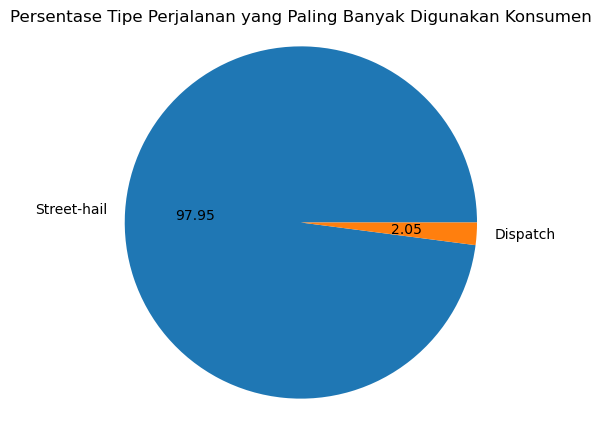

In [171]:
plt.figure(figsize = (5,5))
plt.title('Persentase Tipe Perjalanan yang Paling Banyak Digunakan Konsumen', size = 12)
ax = plt.pie(y,
        labels = x,
       autopct = '%.2f')
plt.axis('equal')
plt.show()

**Berdasarkan pie chart di atas, dapat kita ketahui bahwa:**
1. Tipe perjalanan yang banyak digunakan oleh konsumen adalah tipe Street-hail, dimana penumpang menggunakan jasa tumpangan taksi dengan cara menunggu taksi yang lewat di jalan (tanpa proses booking secara online).
2. Tipe perjalanan Street-hail banyak dipilih oleh penumpang dengan persentase sebesar 97.95%.

# 4. Kesimpulan dan Rekomendasi
Setelah melakukan analisis data, tahap terakhir yang harus dilakukan adalah membuat kesimpulan dan memberikan rekomendasi agar permasalahan dapat teratasi dengan baik.

### 4.1 Kesimpulan
**Berdasarkan analisis data di atas, dapat disimpulkan bahwa:**
1. Sebagian besar jumlah penumpang yang menggunakan jasa taksi pada setiap pemesanan adalah sebanyak 1 orang. Namun, tetap ada kemungkinan bahwa dalam sekali pemesanan, mobil akan diisi oleh 2 sampai 6 orang. Maka dari itu, tetap dibutuhkan kendaraan yang dapat diisi oleh 6 orang.
2. Kebanyakan penumpang akan menunggu taksi lewat dan memberhentikannya di tepi jalan dalam menggunakan jasa taksi tersebut. Maka dari itu, driver tidak bisa hanya menunggu di suatu titik untuk mendapatkan penumpang. 

### 4.2 Rekomendasi
**Beberapa rekomendasi yang dapat diberikan kepada stakeholder untuk membuat suatu perusahaan jasa taksi yang sukses di kalangan konsumen adalah:**
1. Menyediakan mobil yang cukup untuk diisi oleh 6 penumpang.
2. Meminta driver untuk berkeliling dalam mencari penumpang, terutama di waktu-waktu tertentu saat aktivitas masyarakat tinggi.